In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_size + 1)

    def activation_function(self, x):  # step function as an activation function
        
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_function(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

    def plot_decision_regions(self, training_inputs, labels):
        x_min, x_max = training_inputs[:, 0].min() - 1, training_inputs[:, 0].max() + 1
        y_min, y_max = training_inputs[:, 1].min() - 1, training_inputs[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        Z = np.array([self.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(training_inputs[:, 0], training_inputs[:, 1], c=labels)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Perceptron Decision Regions')
        plt.show()

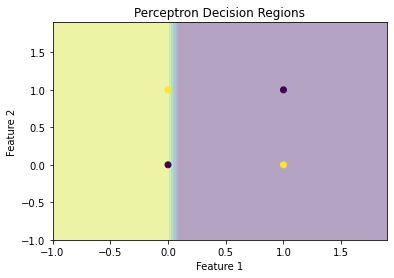

In [3]:
# Example usage
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 0])

perceptron = Perceptron(input_size=2)
perceptron.train(training_inputs, labels)
perceptron.plot_decision_regions(training_inputs, labels)